In [2]:
import numpy as np
from scipy.stats import truncnorm
from scipy.stats import norm
import math
import data_extraction_script_module
import particle_filtering_module
import Data_Generation as DG
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

In [3]:
import pandas as pd
from bokeh.io import push_notebook, output_notebook, show, output_file, reset_output, gridplot, save
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [5]:
#Loading of the data
temperature_data = data_extraction_script_module2.Temperatures()
temperature_data.get_temperatures('C:/Users/roman/Desktop/ENSAE 3A/HMM et Monte Carlo/Donnees temperature/')
electricity_data = data_extraction_script_module2.Electricity()
electricity_data.get_electricity_data("C:/Users/roman/Desktop/ENSAE 3A/HMM et Monte Carlo/Donnees electricite/")

C:\Users\roman\Desktop\ENSAE 3A\HMM et Monte Carlo\Nouveau dossier\data_extraction_script_module2.py:123: UserWarning: WARNING : There is more than 365 days or less than 365 days in dataframe
  warnings.warn("WARNING : There is more than 365 days or less than 365 days in dataframe")


Historique_consommation_INST_2012/Historique_consommation_INST_2012.xls
Number of rows 366


# Forecasts

In [35]:
test = particle_filtering_module.Particle_Filtering_Model(u_heat = 7.3, kappa = np.array([1/8]*8), sigma2 = 27000000, sigma2_s_param = 79000000, sigma2_g_param = 127000000, nb_particles = 1000, len_filtering = 1000)
test.SIS_filter(elec_ts = list(electricity_data.df['15:00'][18:]),
                temperature_ts = list(temperature_data.df['15:00'][18:]),
                daytype_ts = list(electricity_data.df.Day_type[18:]),
                MCMC_init = True,
                len_initialization_MCMC = 14,
                Resampling = True,
                withParam = False,
                compute_prediction = True)

Resampling for  1
Resampling for  2
Resampling for  3
Resampling for  4
Resampling for  5
Resampling for  6
Resampling for  7
Resampling for  8
Resampling for  9
Resampling for  10
Resampling for  11
Resampling for  12
Resampling for  13
Resampling for  14
Resampling for  15
Resampling for  16
Resampling for  17
Resampling for  18
Resampling for  19
Resampling for  20
Resampling for  21
Resampling for  22
Resampling for  23
Resampling for  24
Resampling for  25
Resampling for  26
Resampling for  27
Resampling for  28
Resampling for  29
Resampling for  30
Resampling for  32
Resampling for  33
Resampling for  34
Resampling for  36
Resampling for  38
Resampling for  40
Resampling for  43
Resampling for  46
Resampling for  47
Resampling for  51
Resampling for  53
Resampling for  57
Resampling for  60
Resampling for  62
Resampling for  66
Resampling for  68
Resampling for  70
Resampling for  73
Resampling for  75
Resampling for  77
Resampling for  81
Resampling for  82
Resampling for  84
Re

In [6]:
def geneal_tree(a_t, t_end):
    """This function allows us to construct the matrix which generates the Degeneracy Graph."""
    N = index_resample.shape[0]
    if t_end > T or t_end < 1:
        print("t_end is too big (must be between 1 and T)")
        pass
    else:
        genealogic_tree = np.zeros((N, t_end))
        genealogic_tree[:,t_end-1] = np.arange(N)
        for t in range(1,t_end):
            _t = t_end-t-1
            for i in range(N):
                genealogic_tree[i,_t] = a_t[genealogic_tree[i,_t+1],_t+1]
        return(genealogic_tree)

In [7]:
# Degeneracy Graph.
# T = 99 #len filtering.
index_resample = test.index_resample.T
T = index_resample.T.shape[1]-1
N = index_resample.T.shape[0]
def plot_tree(index_resample ):
    gen_tree = geneal_tree(index_resample, T)
    p = figure(title="Degeneracy tree",plot_width=2500, plot_height=500)
    ml = p.multi_line(pd.DataFrame(np.ones((N, T))*np.arange(T)), pd.DataFrame(gen_tree), line_color="green", alpha=0.5, line_width=2)
    show(p)

plot_tree(index_resample)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


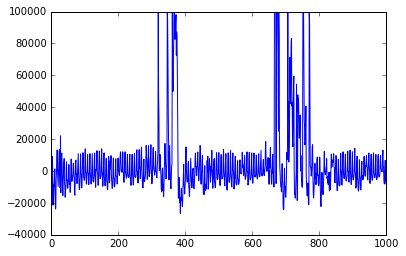

In [138]:
# Real DATA we are trying to predict
yy = np.zeros(1000)
for i in range(1000):
    yy[i] = min(test.prediction_value[i,0]-electricity_data.df['15:00'][19+i],100000)

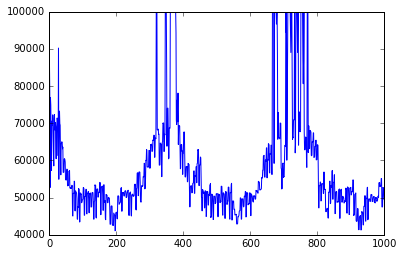

In [136]:
#Predicted Data
xx = np.zeros(1000)
for i in range(1000):
    xx[i] = min(test.prediction_value[i,0],100000)

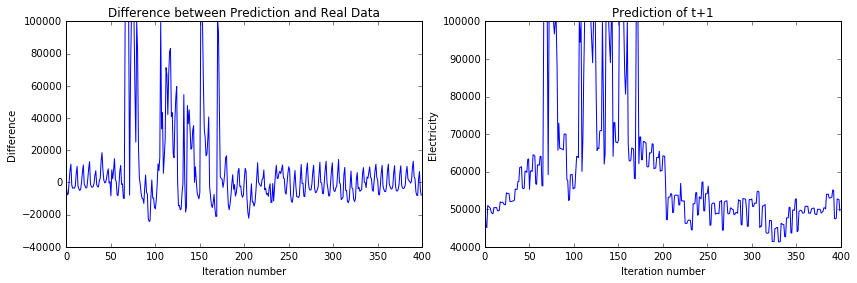

In [150]:
#Comparison between Predicted Data and Real Data.
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)

plt.title('Difference between Prediction and Real Data')
plt.ylabel('Difference')
plt.xlabel('Iteration number')


ax2 = fig.add_subplot(122)


ax1.plot(yy[600:1000])
ax2.plot(xx[600:1000])

fig.tight_layout()
plt.title('Prediction of t+1')
plt.ylabel('Electricity')
plt.xlabel('Iteration number')

#plt.legend(['Pred t|t-1', 'Pred t+1|t-1', 'Pred t+2|t-1', 'Pred t+3|t-1', 'Pred t+4|t-1'], loc='upper right')

plt.show()

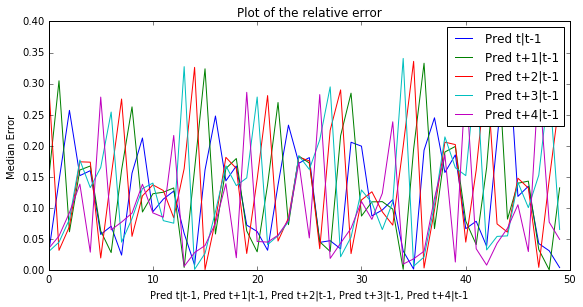

In [146]:
# Let's now plot the relative error.
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(232)
#ax3 = fig.add_subplot(233)
#ax4 = fig.add_subplot(234)
#ax5 = fig.add_subplot(235)

ax1.plot(test.relative_error[500:550,0])
ax1.plot(test.relative_error[500:550,1])
ax1.plot(test.relative_error[500:550,2])
ax1.plot(test.relative_error[500:550,3])
ax1.plot(test.relative_error[500:550,4])

#ax1.plot([np.median(test.relative_error[:,0]),np.median(test.relative_error[:,1]),np.median(test.relative_error[:,2]),
#          np.median(test.relative_error[:,3]),np.median(test.relative_error[:,4])], 'ro')

fig.tight_layout()
plt.title('Plot of the relative error')
plt.ylabel('Median Error')
plt.xlabel('Iteration number')
#ticks = np.arange(0, 5)
#labels = ['Pred t|t-1', 'Pred t+1|t-1', 'Pred t+2|t-1', 'Pred t+3|t-1', 'Pred t+4|t-1']
#plt.xticks(ticks, labels)

plt.xlabel('Pred t|t-1, Pred t+1|t-1, Pred t+2|t-1, Pred t+3|t-1, Pred t+4|t-1')
plt.legend(['Pred t|t-1', 'Pred t+1|t-1', 'Pred t+2|t-1', 'Pred t+3|t-1', 'Pred t+4|t-1'], loc='upper right')

plt.show()

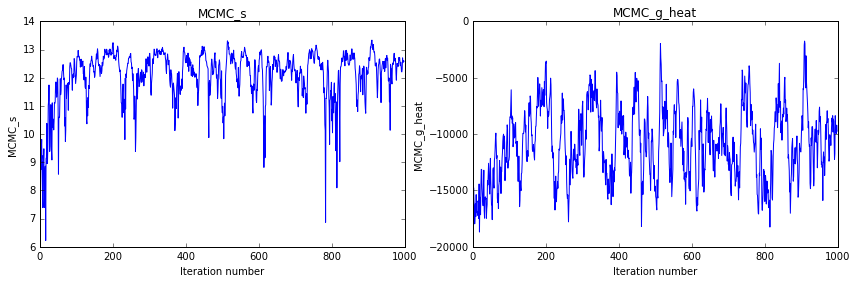

In [102]:
# Let's analyze the evolution of the MCMC parameters.
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
plt.title('MCMC_s')
plt.ylabel('MCMC_s')
plt.xlabel('Iteration number')


ax2 = fig.add_subplot(122)

ax1.plot(np.log(test.MCMC_s[13,1:1000]))

ax2.plot(test.MCMC_g_heat[13,1:1000])

#ax1.plot(test.MCMC_sigma2_s_star)

fig.tight_layout()
plt.title('MCMC_g_heat')
plt.ylabel('MCMC_g_heat')
plt.xlabel('Iteration number')

#plt.legend(['Pred t|t-1', 'Pred t+1|t-1', 'Pred t+2|t-1', 'Pred t+3|t-1', 'Pred t+4|t-1'], loc='upper right')

plt.show()

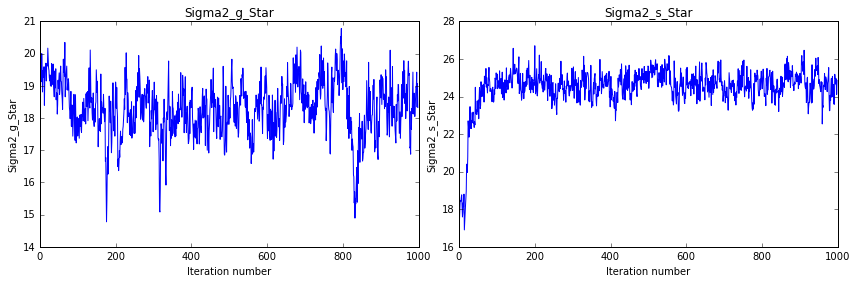

In [91]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
plt.title('Sigma2_g_Star')
plt.ylabel('Sigma2_g_Star')
plt.xlabel('Iteration number')


ax2 = fig.add_subplot(122)

ax1.plot(np.log(test.MCMC_sigma2_g_star[0,1:1000]))

ax2.plot(np.log(test.MCMC_sigma2_s_star[0,1:1000]))

#ax1.plot(test.MCMC_sigma2_s_star)

fig.tight_layout()
plt.title('Sigma2_s_Star')
plt.ylabel('Sigma2_s_Star')
plt.xlabel('Iteration number')

#plt.legend(['Pred t|t-1', 'Pred t+1|t-1', 'Pred t+2|t-1', 'Pred t+3|t-1', 'Pred t+4|t-1'], loc='upper right')

plt.show()

# Parameter estimation using PMCMC

In [ ]:
theta_estimation = particle_filtering_module.PMCMC(u_heat = 13,kappa =  np.array([1/8]*8),sigma2 = 100000000, sigma2_s_param = 100000000, sigma2_g_param = 100000000 , nb_particles = 500, len_filtering = 1000, len_metropolis = 300)

In [ ]:
theta_estimation.PMMH(elec_ts = electricity_data.df['15:00'][18:], temperature_ts =  temperature_data.df['15:00'][18:], daytype_ts = electricity_data.df.Day_type[18:], 
                      std_u_heat_proposal = 1, std_sigma2_proposal = 10000000, std_sigma2_s_param_proposal= 10000000, 
                      std_sigma2_g_param_proposal=10000000, MCMC_init = True, len_initialization_MCMC = 14, Resampling = True,
                      withParam = False, param = np.zeros(4))

In [ ]:
theta_estimation.plot_parameter_evolution(burnin = 0)

In [ ]:
theta_estimation.plot_acf_PMMH(burnin = 0)